### Simualting EEG data for analysis

There are two parts of synthesis

1. Noise

2. Signal

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. pure white noise
eeg_srate = 100 # Hz
eeg_points = eeg_srate * 2 # seconds
eeg_trials = 30
n_channels = 10

In [7]:
eeg_times = np.arange(0, eeg_points / eeg_srate, 1 / eeg_srate)
eeg_times

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [8]:
eeg_data = np.random.randn(n_channels, eeg_points, eeg_trials)
eeg_data.shape

(10, 200, 30)

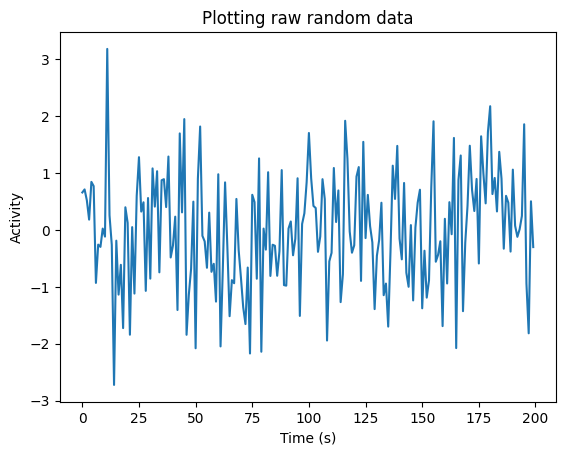

In [15]:
plt.title("Plotting raw random data")
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 0])
plt.show()

In [16]:
# Modifying Power (Amplitude)
eeg_data = 10 * np.random.randn(n_channels, eeg_points, eeg_trials)
eeg_data.shape

(10, 200, 30)

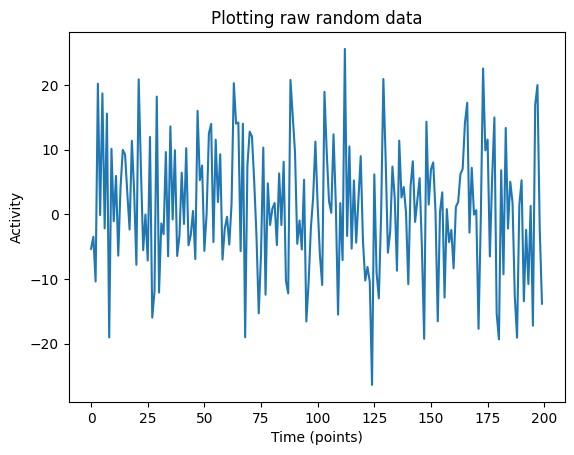

In [18]:
plt.title("Plotting raw random data")
plt.xlabel('Time (points)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 0])
plt.show()

In [21]:
# uniformly distributed noise
eeg_data = np.random.rand(n_channels, eeg_points, eeg_trials)
eeg_data.shape

(10, 200, 30)

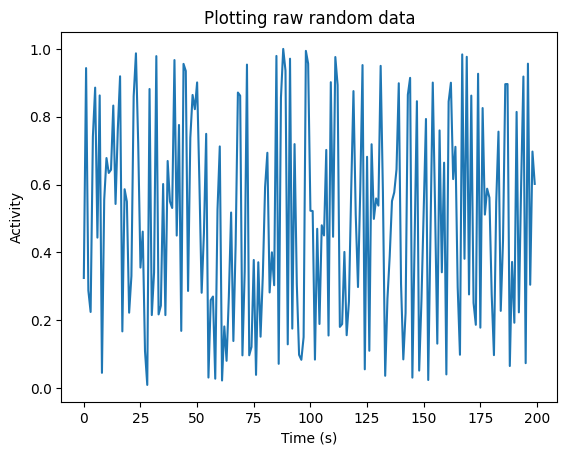

In [22]:
plt.title("Plotting raw random data")
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 0])
plt.show()

# Generating pink noise

In [23]:
n_channels = 4
ed = 50 # exponential decay
eeg_data = np.zeros((n_channels, eeg_points, eeg_trials))

In [30]:
for i in range(n_channels):
    for j in range(eeg_trials):
        # generate power spectrum
        ps = np.random.rand(1, eeg_points) * np.exp(-np.arange(0, eeg_points) / ed)
        # Inverted Fourier transform
        fourier_coef = ps * np.exp(2 * np.pi * 1j * np.random.rand(ps.shape[0], ps.shape[1]))
        eeg_data[i, :, j] = np.fft.ifftn(fourier_coef)

C:\Users\tiger\AppData\Local\Temp\ipykernel_4288\1268723041.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  eeg_data[i, :, j] = np.fft.ifftn(fourier_coef)


In [31]:
eeg_data[0, :, 0]

array([-1.04780951e-02, -1.00592026e-02, -5.12140981e-03, -2.11712982e-03,
       -1.46100362e-02, -1.66093226e-02, -3.44057270e-03,  6.14623376e-03,
        3.38589537e-03,  5.39062397e-04,  6.82022611e-03,  4.79020007e-03,
        8.88073883e-03, -3.65740249e-03, -1.71816692e-02, -1.81823323e-02,
       -1.55268160e-02,  2.38071380e-05,  6.40311741e-03, -3.76690373e-03,
       -1.86670802e-03, -1.00749966e-02, -5.08320996e-03,  4.56280469e-04,
        3.99613399e-03,  3.29187681e-03,  3.07710808e-03, -2.37283421e-03,
        2.58589311e-03,  1.13495547e-02,  5.16860631e-03, -1.12413355e-02,
        9.37588469e-03, -8.87485802e-03, -1.81095976e-02, -9.09874766e-03,
        2.01056896e-03,  1.00279826e-02,  1.10114797e-05, -4.55378826e-03,
       -6.62347664e-03,  5.58186194e-04,  6.26571273e-03,  6.77645355e-03,
        6.09586517e-03, -1.49764532e-02, -2.10236957e-02, -1.35395050e-02,
       -8.84523166e-03, -1.17310133e-02, -1.06501075e-02, -4.05246462e-03,
       -6.91374680e-03, -

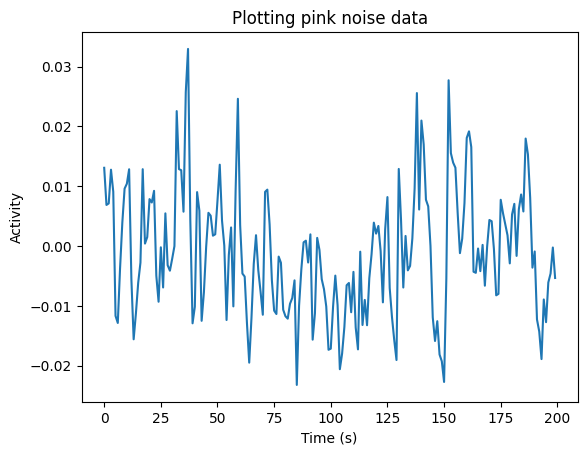

In [33]:
plt.title("Plotting pink noise data")
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 3])
plt.show()

# Generating ongoing stationary signal

In [44]:
freq = [3, 5, 16]
amps = [3, 4, 5]

for i in range(n_channels):
    for j in range(eeg_trials):
        sinwave = np.zeros((1, eeg_points))
        for k in range(len(freq)):
            sinwave = sinwave + amps[k] * np.sin(2 * np.pi * freq[k] * eeg_times)

        eeg_data[i, :, j] = sinwave + np.random.randn(1, eeg_points)


In [45]:
eeg_data[0,:, 0]

array([ 1.15920314e+00,  5.77371516e+00,  7.33454452e+00,  5.51471074e+00,
        1.59398140e+00,  7.79111122e-01,  4.50215066e+00,  1.05440308e+01,
        1.18822031e+01,  6.09947025e+00, -8.69633969e-01, -2.41012825e+00,
       -1.42866894e+00,  1.55941916e+00,  2.97215543e+00, -8.19782236e-01,
       -5.19750249e+00, -8.45473712e+00, -6.86111695e+00, -8.82039156e-01,
        4.20828715e+00,  4.03409000e+00, -2.80451883e-01, -5.06223889e+00,
       -3.44255938e+00,  9.07085817e-01,  4.27634589e+00,  5.56300859e+00,
        1.80772509e+00, -5.21706665e+00, -6.31470886e+00, -3.52610762e+00,
        3.39637427e-01,  1.11482675e+00, -2.04488250e+00, -7.63514077e+00,
       -7.20923140e+00, -4.85237083e+00,  2.93437161e+00,  6.98086797e+00,
        5.57308429e+00,  4.12330586e+00,  8.25961964e-03,  3.70812121e+00,
        5.99715153e+00,  1.00719359e+01,  1.11565141e+01,  2.86111329e+00,
       -6.44636709e-01, -1.87818811e+00,  1.28481756e+00,  1.18452640e+00,
        1.14188065e+00, -

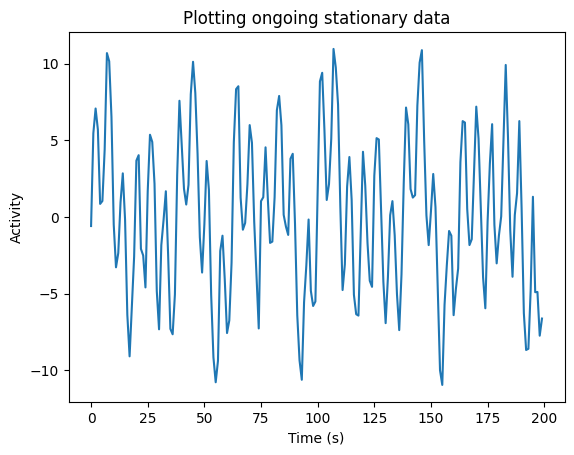

In [47]:
plt.title("Plotting ongoing stationary data")
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 3])
plt.show()

# Generating ongoing non-stationary data

In [48]:
peak_f = 14
fwhm = 5

hz = np.linspace(0, eeg_srate, eeg_points)

s = fwhm * (2 * np.pi -1) / (4*np.pi)
x = hz - peak_f
fg = np.exp(-.5 * (x/s) ** 2)

(0.0, 30.0)

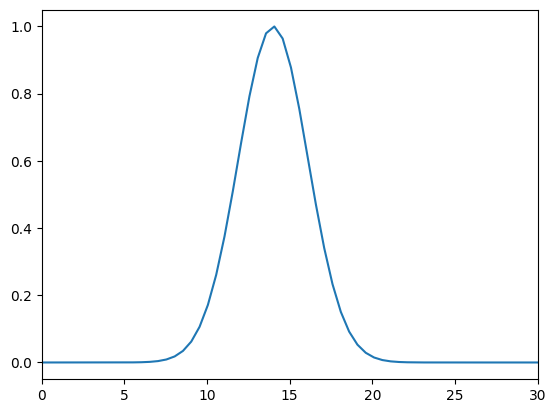

In [51]:
plt.plot(hz, fg)
plt.xlim([0, 30])

In [55]:
for i in range(n_channels):
    for j in range(eeg_trials):
        fourier_coef = np.random.randn(1, eeg_points) * np.exp(1j * 2 * np.pi * np.random.rand(1, eeg_points))
        fourier_coef = fourier_coef * fg

        np.fft.ifftn(fourier_coef)
        
        eeg_data[i, :, j] = np.real(np.fft.ifftn(fourier_coef))

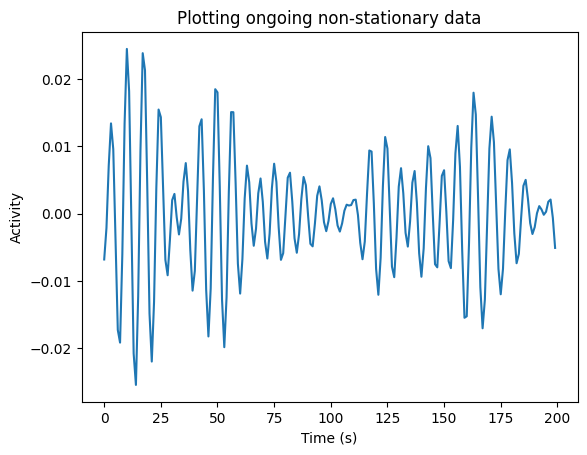

In [56]:
plt.title("Plotting ongoing non-stationary data")
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 3])
plt.show()

In [57]:
peak_freq = [8, 21]
fwhm = 5

hz = np.linspace(0, eeg_srate, eeg_points)

s = fwhm * (2 * np.pi -1) / (4*np.pi)
x = hz - peak_freq[0]
fg1 = np.exp(-.5 * (x/s) ** 2)

s = fwhm * (2 * np.pi -1) / (4*np.pi)
x = hz - peak_freq[1]
fg2 = np.exp(-.5 * (x/s) ** 2)

In [58]:
for i in range(n_channels):
    for j in range(eeg_trials):
        fourier_coef = np.random.randn(1, eeg_points) * np.exp(1j * 2 * np.pi * np.random.rand(1, eeg_points))
        fourier_coef1 = fourier_coef * fg1
        fourier_coef2 = fourier_coef * fg2

        np.fft.ifftn(fourier_coef)
        
        eeg_data[i, :, j] = np.real(np.fft.ifftn(fourier_coef1 + fourier_coef2))

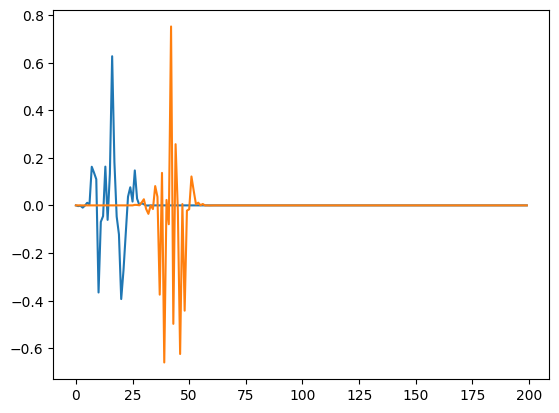

In [62]:
plt.plot(fourier_coef1[0,:])
plt.plot(fourier_coef2[0,:])
plt.show()

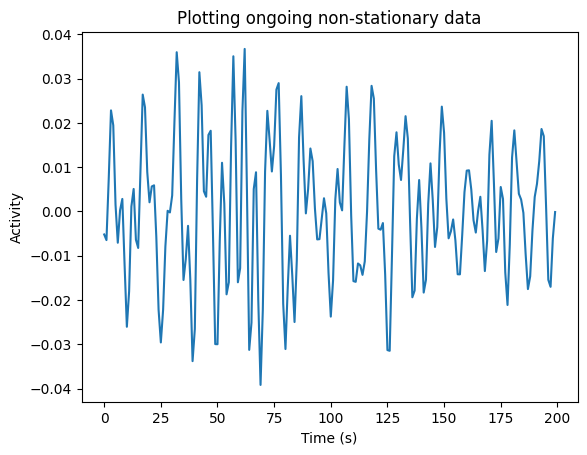

In [59]:
plt.title("Plotting ongoing non-stationary data")
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.plot(eeg_data[0, :, 3])
plt.show()

# Generating transient noise

In [71]:
peak_time = float(1)
width = 0.1

eeg_data = np.zeros((n_channels, eeg_points, eeg_trials))

In [89]:
for i in range(n_channels):
    for j in range(eeg_trials):
        trial_peak = peak_time + np.random.randn(1, 1) / 1
        gaus = np.exp(-(eeg_times-trial_peak)**2 / (2*width**2))

        eeg_data[i, :, j] = gaus

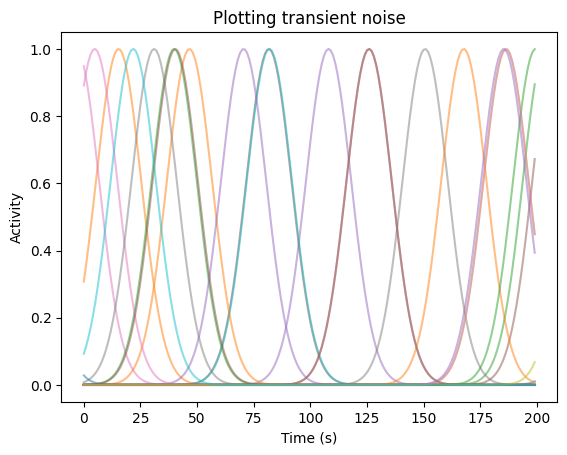

In [90]:
plt.title("Plotting transient noise")
plt.xlabel('Time (s)')
plt.ylabel('Activity')

for j in range(eeg_trials):
    plt.plot(eeg_data[0, :, j], alpha=0.5)
plt.show()

# Generating oscillation with gaussian noise

In [92]:
sin_freq = 8
width = 0.2
peak_time = 1
ed =50

eeg_data = np.zeros((n_channels, eeg_points, eeg_trials))

In [119]:
for i in range(n_channels):
    for j in range(eeg_trials):

        trial_peak = peak_time + np.random.randn(1, 1) /5
        gaus = np.exp(-(eeg_times-trial_peak)**2 / (2*width**2))

        sw = np.cos(2 * np.pi * sin_freq * eeg_times + np.random.rand(1, 1) * np.pi)

        eeg_data[i, :, j] = sw * gaus #+ np.random.randn(1, eeg_points) * 0.1

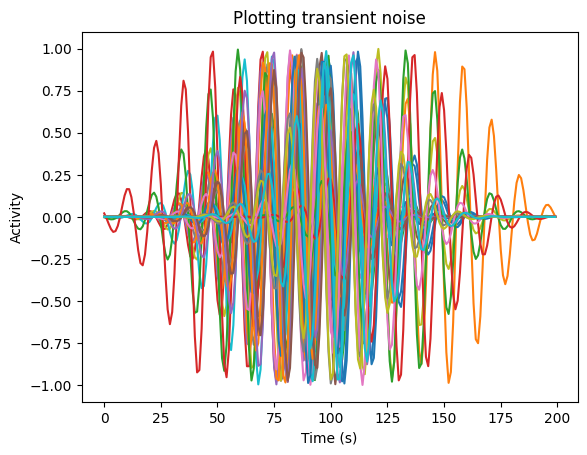

In [120]:
plt.title("Plotting transient noise")
plt.xlabel('Time (s)')
plt.ylabel('Activity')

for j in range(eeg_trials):
    plt.plot(eeg_data[0, :, j])
plt.show()

In [ ]:
# generate power spectrum
        ps = np.random.rand(1, eeg_points) * np.exp(-np.arange(0, eeg_points) / ed)
        # Inverted Fourier transform
        fourier_coef = ps * np.exp(2 * np.pi * 1j * np.random.rand(ps.shape[0], ps.shape[1]))
        eeg_data[i, :, j] = np.fft.ifftn(fourier_coef)

In [128]:
for i in range(n_channels):
    for j in range(eeg_trials):

        trial_peak = peak_time + np.random.randn(1, 1) /7.777777
        gaus = np.exp(-(eeg_times-trial_peak)**2 / (2*width**2))

        # ADDING PINK NOISE
        # generate power spectrum
        ps = np.random.rand(1, eeg_points) * np.exp(-np.arange(0, eeg_points) / ed)
        # Inverted Fourier transform
        fourier_coef = ps * np.exp(2 * np.pi * 1j * np.random.rand(ps.shape[0], ps.shape[1]))

        sw = np.cos(2 * np.pi * sin_freq * eeg_times + np.random.rand(1, 1) * np.pi)

        eeg_data[i, :, j] = sw * gaus + np.real(np.fft.ifftn(fourier_coef))*10 #+ np.random.randn(1, eeg_points) * 0.1

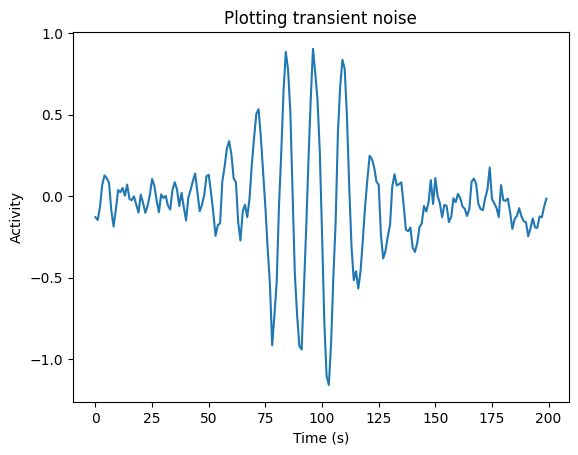

In [129]:
plt.title("Plotting transient noise")
plt.xlabel('Time (s)')
plt.ylabel('Activity')

for j in range(1):
    plt.plot(eeg_data[0, :, j])
plt.show()